In [50]:
import numpy as np
import gym
import navstack_gym
import matplotlib.pyplot as plt
from nav_sim_modules import MAP_OBS_VAL, MAP_PASS_VAL, MAP_UNK_VAL

In [51]:
env = gym.make('InvisibleTreasureChestRoom-v0', path_turnable=np.pi/8, avoidance_size=3, move_limit=-1, path_planning_count=10, path_exploration_count=4000)
obs = env.reset(is_generate_pose=True)

/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


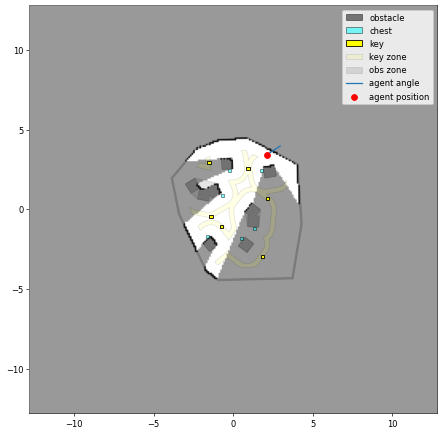

In [52]:
plt.imshow(env.render('rgb_array'))

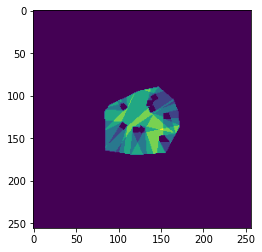

In [53]:
N = 5
heat = np.zeros_like(env.observation_space.sample(), dtype=np.float64)
for i in range(N):
    obs = env.reset(is_generate_room=False)
    # heat += (env.scener.env_pixel == MAP_PASS_VAL) / N
    heat += (env.actioner.occupancy_map == MAP_PASS_VAL) / N
    # heat += (obs == MAP_OBS_VAL) / N

plt.imshow(heat)

In [54]:
env = gym.make('VisibleTreasureChestRoom-v0', path_turnable=np.pi/8, avoidance_size=3, move_limit=-1, path_planning_count=10, path_exploration_count=4000)
obs = env.reset(is_generate_pose=True)

/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


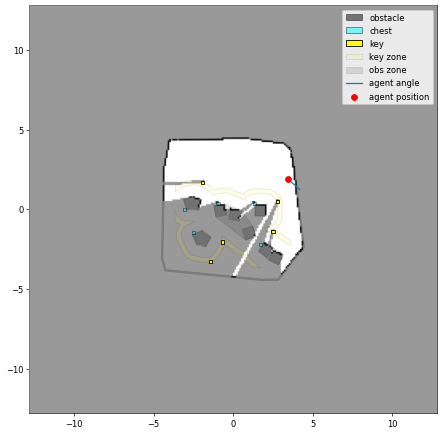

In [55]:
plt.imshow(env.render('rgb_array'))

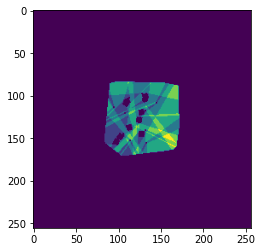

In [56]:
N = 5
heat = np.zeros_like(env.observation_space.sample(), dtype=np.float64)
for i in range(N):
    obs = env.reset(is_generate_room=False)
    # heat += (env.scener.env_pixel == MAP_PASS_VAL) / N
    heat += (env.actioner.occupancy_map == MAP_PASS_VAL) / N
    # heat += (obs == MAP_OBS_VAL) / N

plt.imshow(heat)

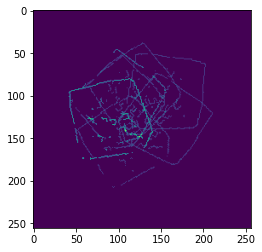

In [57]:
N = 10
heat = np.zeros_like(env.observation_space.sample(), dtype=np.float64)
for i in range(N):
    obs, _, _, _ = env.step(env.action_space.sample())
    # heat += (env.scener.env_pixel == MAP_PASS_VAL) / N
    # heat += (env.actioner.occupancy_map == MAP_PASS_VAL) / N
    heat += (obs == MAP_OBS_VAL) / N

plt.imshow(heat)

In [58]:
env.unfound_key, env.unfound_chest

(array([ True,  True, False,  True, False]),
 array([ True,  True,  True,  True, False]))

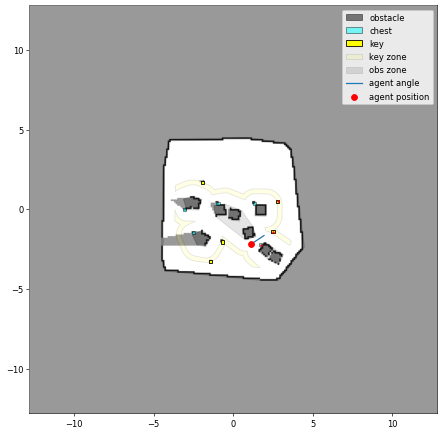

In [59]:
plt.imshow(env.render('rgb_array'))

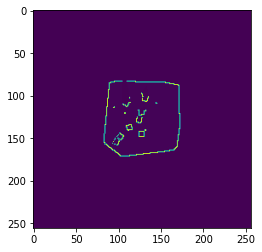

In [60]:
plt.imshow(env.actioner.occupancy_map)